In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [41]:
#importation des data 
ventes = pd.read_csv(r"E:\Openclassroom Data analyst\Projet4\dataset_P4\transactions.csv")
clients = pd.read_csv(r"E:\Openclassroom Data analyst\Projet4\dataset_P4\customers.csv")
produits = pd.read_csv(r"E:\Openclassroom Data analyst\Projet4\dataset_P4\products.csv")


# Nettoyage données produits 
- Verification des prix abérants 
- Verrification des doublons ID
- Vérification données manquantes 

### Verifications  des prix abérants 

In [42]:
#il ne semble ne pas y avoir de prix abérants -1, réduction ? 
produits.describe(include = "all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,1_696,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


### Vérifications des doublons 

In [43]:
#verification des doublons et valeurs manquantes dans les produits
# ou comparaison count/unique avec .describe()
print(produits.shape)
verifDoublonProd = produits["id_prod"]
verifDoublonProd.drop_duplicates
print(verifDoublonProd.shape)

(3287, 3)
(3287,)


### Vérifications des données manquantes 

In [44]:
# vérifications des null 
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [45]:
# vérifications des NaN 
produits.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

# Nettoyage données clients
- Vérification des doublons 
- Vérification des sexes 
- Vérifications des années de naissances
- Vérfications des données manquantes

### Vérifications doublons et sexes

In [46]:
#Vérifications des doublons, sexes et années de naissances
clients.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_8464,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [47]:
#Verification des doublons: 
# ou comparaison count/unique avec .describe()
print(clients.shape)
verifDoublonCli = clients["client_id"]
verifDoublonCli.drop_duplicates
print(verifDoublonCli.shape)

(8623, 3)
(8623,)


In [48]:
#verfication des "sex" (si il y a uniquement des "f" et des "m")
verifSex = clients.groupby('sex').count()
verifSex

,client_id,birth
sex,,
f,4491,4491
m,4132,4132


### Vérfications des données manquantes

In [49]:
# vérifications des null 
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [50]:
# vérifications des NaN 
clients.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

# Nettoyage données ventes
- vérifications données manquantes

- vérifications produits dans la liste des produits
- vérifications clients dans la liste des clients 
- vérifications dates 

    - formatage 
    - imputation 
    - suppression

### Vérifications des données manquantes 

In [51]:
# vérifications des null 
ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [52]:
# vérifications des NaN 
ventes.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

### Vérifications des produits dans la liste des produits

In [53]:
#ajout d'une colone isin
ventes['is_id_prod']= ventes.id_prod.isin(produits["id_prod"])
#filtre colonne isn 
ventesMauvaisProduit = ventes[ventes['is_id_prod']== False ]

In [54]:
#inspections des  produits pas dans la liste
ventesMauvaisProduit.groupby('id_prod').count()

,date,session_id,client_id,is_id_prod
id_prod,,,,
0_2245,103,103,103,103


103 ventes pas dans base de données des produits 2 choix: 
- suppression de ces ventes 
- imputation de ce produit dans la base de donnée avec pour valeur la moyenne des autres produits de sa catégorie  

In [55]:
#Imputation du produit dans la bases de données produits (valeurs moyennes des produits de sa catégorie)
produits.loc[3288] = {'id_prod':"0_2245","price":produits[produits['categ']== 0].mean().iloc[0],"categ":0}

### Vérifications des clients dans la liste des clients

In [56]:
#ajout d'une colone isin
ventes['is_client_id']= ventes.client_id.isin(clients["client_id"])
#filtre colonne isn 
ventesMauvaisClient = ventes[ventes['is_client_id'] == False ]

In [57]:
#inspection des clients
ventesMauvaisClient

,id_prod,date,session_id,client_id,is_id_prod,is_client_id


### Vérefications des dates 
- dates avec test semblent poser problème
- vérification de la continuité des dates 

#####  vérification des dates tests

In [58]:
ventesTest = ventes[ventes['date'].str.contains('.*test.*')]

In [59]:
# un seul produits : T_0 (price -1) semble etre un test de machine on supprimera donc ces données 
ventesTest.describe()

,id_prod,date,session_id,client_id,is_id_prod,is_client_id
count,200,200,200,200,200,200
unique,1,39,1,2,1,1
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,True,True
freq,200,13,200,106,200,200


In [74]:
#Filtrages des données 
newVentes = ventes[ventes['date'].str.contains('.*test.*')== False]


In [75]:
newVentes.describe()

,id_prod,date,session_id,client_id,is_id_prod,is_client_id
count,336816,336816,336816,336816,336816,336816
unique,3265,336816,169194,8600,2,1
top,1_369,2021-11-05 17:39:34.650755,s_118668,c_1609,True,True
freq,1081,1,14,12855,336713,336816


##### vérification de la continuité des dates 

In [76]:
#convert en date time
newVentes["dates"]= pd.to_datetime(newVentes["date"]) 
newVentes = newVentes.set_index("dates")

E:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


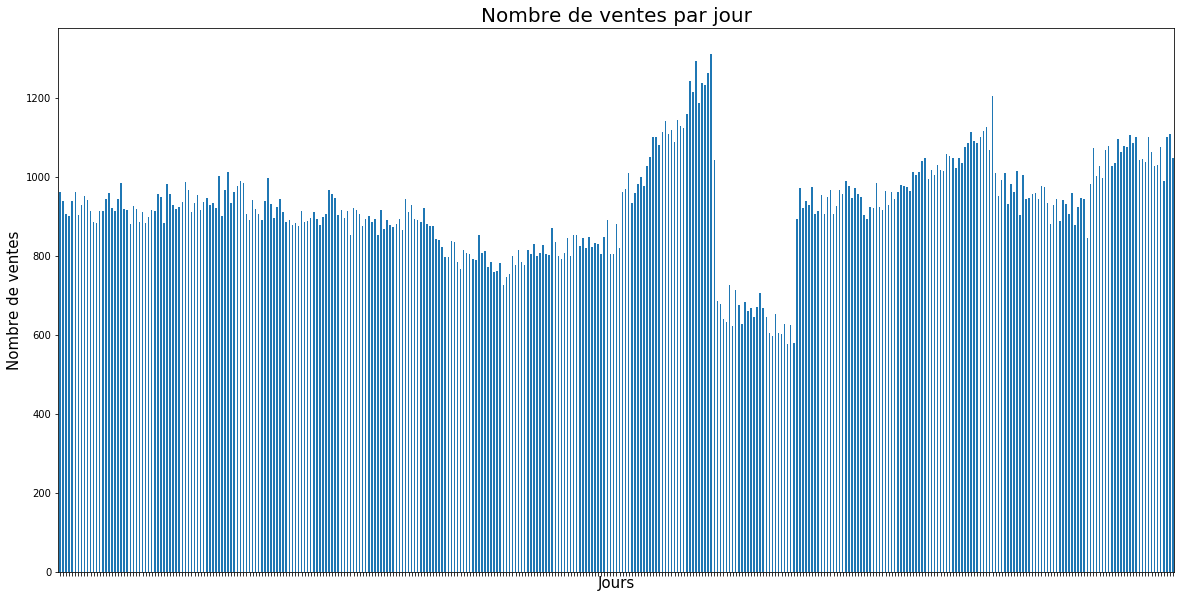

In [95]:
# Ventes par jour 
ventesAnneeMoisJour = newVentes.groupby([(newVentes.index.year),(newVentes.index.month),(newVentes.index.day)]).count()
ventesAnneeMoisJour = ventesAnneeMoisJour[['id_prod']]
ventesAnneeMoisJour.columns= ['nb_ventes']
ventesAnneeMoisJour["nb_ventes"].plot(kind = 'bar',figsize=(20,10))
plt.xlabel('Jours', fontsize=15)
plt.ylabel('Nombre de ventes', fontsize=15)
plt.title("Nombre de ventes par jour",  fontsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom Edge are off
    top=False,         # ticks along the top Edge are off
    labelbottom=False) # labels along the bottom Edge are off


In [97]:
test = newVentes.groupby(pd.Grouper(freq='M')).count()
test = test.rest

,id_prod,date,session_id,client_id,is_id_prod,is_client_id
dates,,,,,,
2021-03-31,28568,28568,28568,28568,28568,28568
2021-04-30,28415,28415,28415,28415,28415,28415
2021-05-31,28245,28245,28245,28245,28245,28245
2021-06-30,26819,26819,26819,26819,26819,26819
2021-07-31,24716,24716,24716,24716,24716,24716
2021-08-31,25619,25619,25619,25619,25619,25619
2021-09-30,33266,33266,33266,33266,33266,33266
2021-10-31,21584,21584,21584,21584,21584,21584
2021-11-30,28277,28277,28277,28277,28277,28277


Text(0.5, 1.0, 'Nombre de ventes par mois')

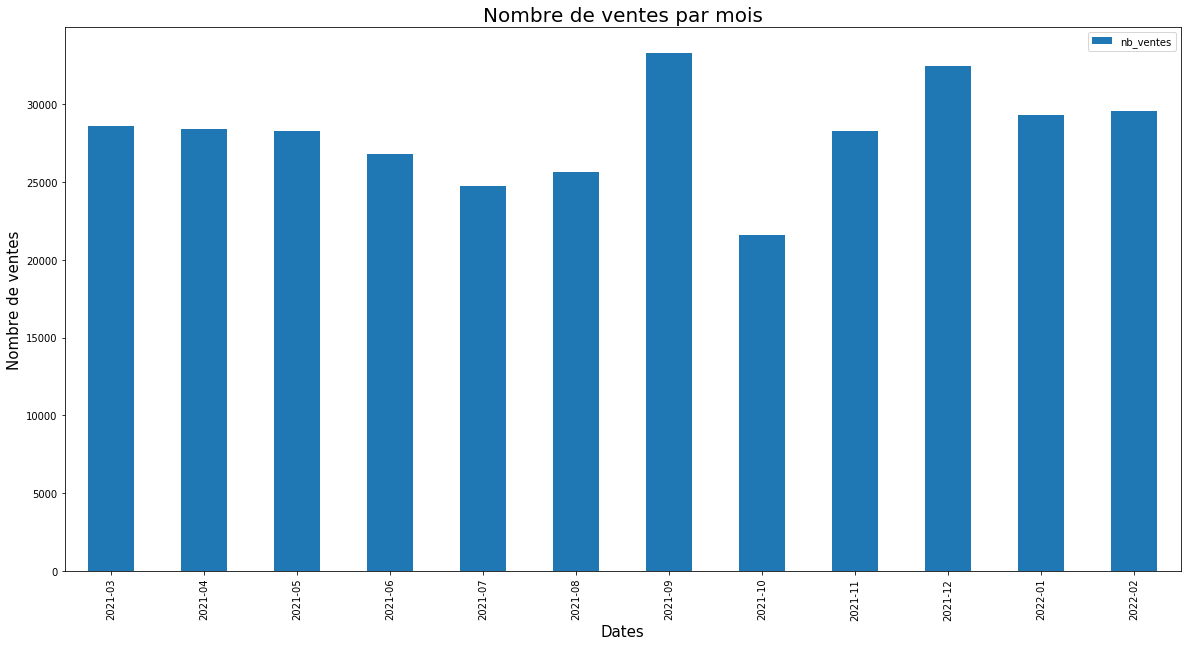

In [105]:
# Ventes Mois 
ventesMois = newVentes.groupby(pd.Grouper(freq='M')).count()
ventesMois = ventesMois.reset_index()
ventesMois = ventesMois.sort_values('dates')
ventesMois['dates'] = ventesMois['dates'].dt.strftime('%Y-%m')
ventesMois = ventesMois[["dates","is_id_prod"]]
ventesMois = ventesMois.set_index('dates')
ventesMois.columns = ['nb_ventes']
ventesMois.plot(kind = 'bar',figsize=(20,10))
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Nombre de ventes', fontsize=15)
plt.title("Nombre de ventes par mois",  fontsize=20)

Text(0.5, 1.0, 'Nombre de ventes par jour mois problématique')

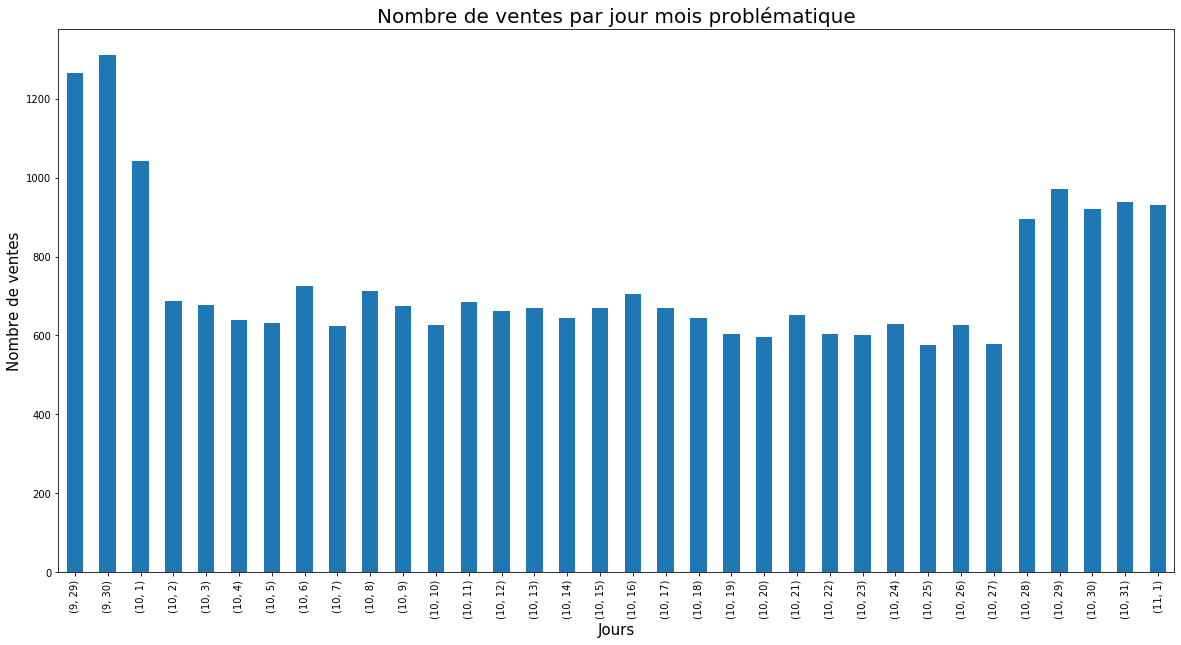

In [108]:
#inspection de la zone problèmatique
newVentesPbq = newVentes.loc["2021-9-29":'2021-11-01']
newVentesPbqMoisJours = newVentesPbq.groupby([(newVentesPbq.index.month),(newVentesPbq.index.day)]).count()
newVentesPbqMoisJours = newVentesPbqMoisJours[["is_id_prod"]]
newVentesPbqMoisJours.columns = ['nb_ventes']
newVentesPbqMoisJours["nb_ventes"].plot(kind = 'bar',figsize=(20,10))
plt.xlabel ('Jours', fontsize= 15)
plt.ylabel ('Nombre de ventes', fontsize= 15)
plt.title ("Nombre de ventes par jour mois problématique", fontsize = 20)

In [66]:
# Problème pas en fonction du mois : pas de pb en début et en fin de mois.
# inspection des ventes par catégorie 

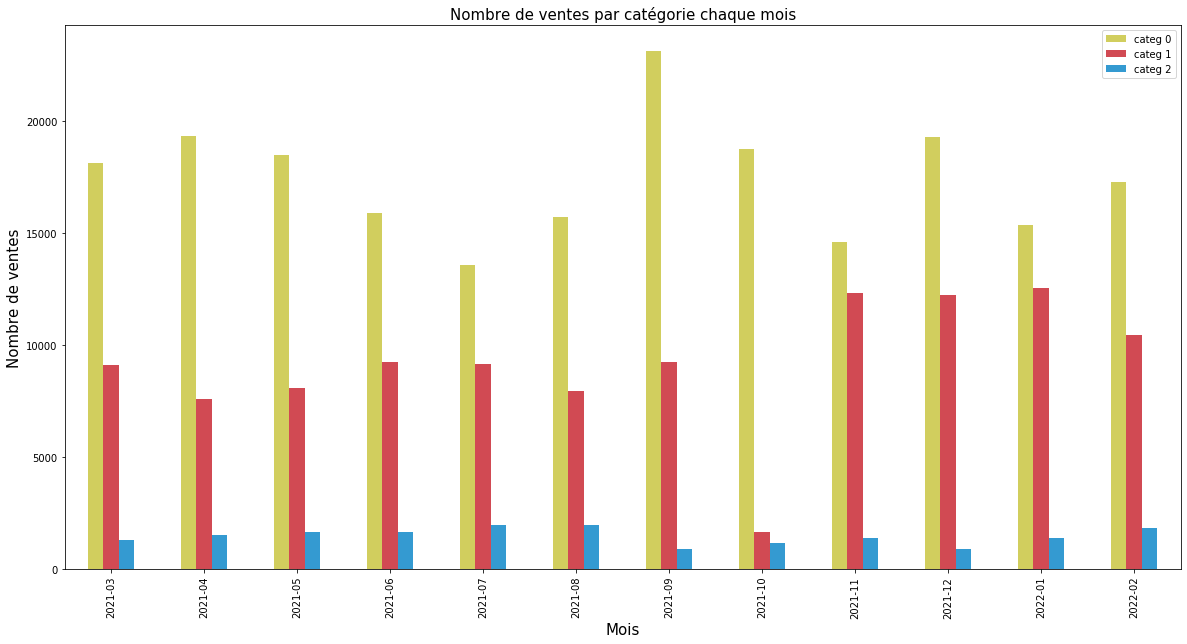

In [80]:
#Vente par catégorie par mois 
newVentesBis = newVentes.reset_index()
ventesAvecCategorie = pd.merge(newVentesBis , produits , on ="id_prod")
ventesAvecCategorieMoisCateg = ventesAvecCategorie.groupby([pd.Grouper(key = 'dates' , freq = 'M'),'categ']).count()
ventesAvecCategorieMoisCateg = ventesAvecCategorieMoisCateg[['client_id']]
ventesAvecCategorieMoisCateg.columns = ["nb_ventes"]
ventesAvecCategorieMoisCateg = ventesAvecCategorieMoisCateg.reset_index()
ventesAvecCategorieMoisCateg['dates'] = ventesAvecCategorieMoisCateg['dates'].dt.strftime('%Y-%m')
ventesAvecCategorieMoisCateg = ventesAvecCategorieMoisCateg.groupby(['dates',"categ"]).sum()
ventesAvecCategorieMoisCateg.unstack(level= 1).plot(kind = 'bar', figsize = (20,10), label ='categ',
                                                    color = ('#D1CE5E',"#D14A53",'#349AD1'))
plt.xlabel('Mois', fontsize=15)
plt.ylabel('Nombre de ventes', fontsize=15)
plt.title("Nombre de ventes par catégorie chaque mois",  fontsize=15)
plt.legend(["categ 0","categ 1","categ 2"])



Grosse baisse des ventes de produits de catégorie 1, Deux options possibles:
- Bug
- Rupture de stock 

A  savoir pour l'analyse des ventes 

# Nouveau fichier CSV pour l'analyse de données 

In [68]:
produits = produits.set_index('id_prod')
produits.to_csv("produitsOk.csv")

In [69]:
newVentes = newVentes.reset_index()
newVentes = newVentes[["id_prod",'dates',"session_id",'client_id']]
newVentes = newVentes.set_index('id_prod')
newVentes.to_csv('ventesOk.csv')


In [70]:
clients = clients.set_index('client_id')
clients.to_csv('clientsOk.csv')